Epoch 1/5
1500/1500 [==============================] - 11s 6ms/step - loss: 0.2710 - accuracy: 0.9208 - val_loss: 0.1421 - val_accuracy: 0.9594
Epoch 2/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1133 - accuracy: 0.9649 - val_loss: 0.1065 - val_accuracy: 0.9687
Epoch 3/5
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0785 - accuracy: 0.9752 - val_loss: 0.0945 - val_accuracy: 0.9724
Epoch 4/5
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0576 - accuracy: 0.9821 - val_loss: 0.1006 - val_accuracy: 0.9712
Epoch 5/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0445 - accuracy: 0.9861 - val_loss: 0.1010 - val_accuracy: 0.9723
313/313 - 2s - loss: 0.0916 - accuracy: 0.9733 - 2s/epoch - 5ms/step
테스트 정확도: 0.97


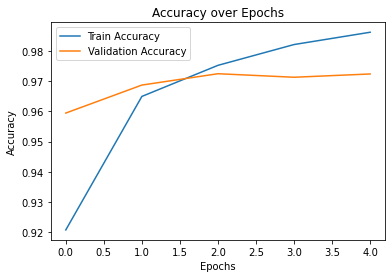

1/1 [==============================] - 0s 276ms/step


C:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


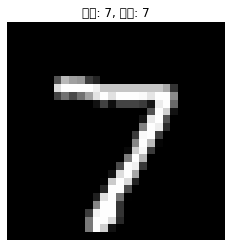

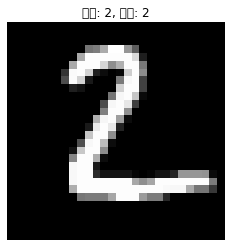

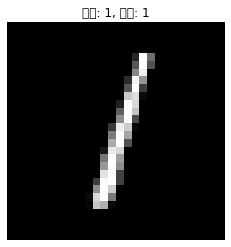

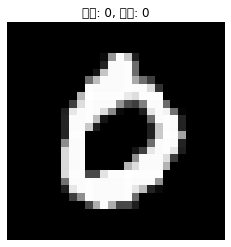

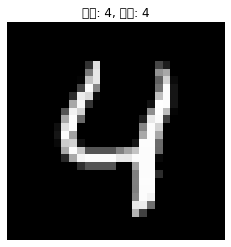

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"테스트 정확도: {test_acc:.2f}")

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')
plt.show()

predictions = model.predict(x_test[:5])
for i in range(5):
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"예측: {tf.argmax(predictions[i]).numpy()}, 실제: {tf.argmax(y_test[i]).numpy()}")
    plt.axis('off')
    plt.show()
